# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [2]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [3]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [4]:
df_yellow.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         14.5    3.0      0.5        3.65           0.0   
1             1          8.0    0.5      0.5        4.00           0.0   
2             1          7.5    0.5      0.5        1.76           0.0   
3             2          8.0    0.5      0.5        0.00           0.0   
4             1         23.5    0.5      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    0.3         21.95                   2.5          0.0  
1                    0.3         13.30                   0.0          0.0  
2                    0.3         10.56                   0.0          0.0  
3                    0.3         11.80                   2.5          0.0  
4                    0.3         30.30                   2.5          0.0

In [5]:
df_green.head(5)

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2022-01-01 00:14:21   2022-01-01 00:15:33                  N   
1         1  2022-01-01 00:20:55   2022-01-01 00:29:38                  N   
2         1  2022-01-01 00:57:02   2022-01-01 01:13:14                  N   
3         2  2022-01-01 00:07:42   2022-01-01 00:15:57                  N   
4         2  2022-01-01 00:07:50   2022-01-01 00:28:52                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            42            42              1.0           0.44   
1         1.0           116            41              1.0           2.10   
2         1.0            41           140              1.0           3.70   
3         1.0           181           181              1.0           1.69   
4         1.0            33           170              1.0           6.26   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount ehail_fee  \
0          3.5   0.50      0.5        0.00           0.0      None   
1          9.5   0.50      0.5        0.00           0.0      None   
2         14.5   3.25      0.5        4.60           0.0      None   
3          8.0   0.50      0.5        0.00           0.0      None   
4         22.0   0.50      0.5        5.21           0.0      None   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                    0.3          4.80           2.0        1.0   
1                    0.3         10.80           2.0        1.0   
2                    0.3         23.15           1.0        1.0   
3                    0.3          9.30           2.0        1.0   
4                    0.3         31.26           1.0        1.0   

   congestion_surcharge  
0                  0.00  
1                  0.00  
2                  2.75  
3                  0.00  
4                  2.75

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

In [6]:
df_yellow_sampless = df_yellow[(df_yellow['fare_amount'] >= 1) & (df_yellow['fare_amount'] < 500)]
df_green_sampless = df_green[(df_green['fare_amount'] >= 1) & (df_green['fare_amount'] < 500)]

Fare amount should not be 0, therefore we are removing some outliers before we run the code. Also, the dataframe had high, unrealistic values. Therefore everything below 1 and everything above 500 is excluded from this sample of the dataframe which is used for the plot.

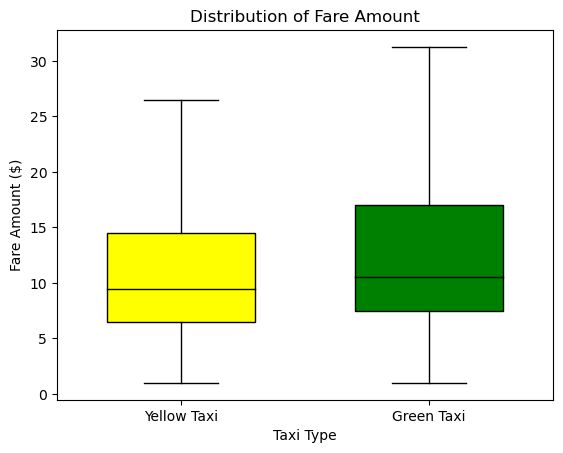

In [7]:

import matplotlib.pyplot as plt

# Plotting boxplot for yellow taxis
plt.boxplot(df_yellow_sampless['fare_amount'], positions=[1], sym='', widths=0.6, patch_artist=True, boxprops=dict(facecolor='yellow', color='black'), medianprops=dict(color='black'))

# Plotting boxplot for green taxis
plt.boxplot(df_green_sampless['fare_amount'], positions=[2], sym='', widths=0.6, patch_artist=True, boxprops=dict(facecolor='green', color='black'), medianprops=dict(color='black'))

plt.xlabel('Taxi Type')
plt.ylabel('Fare Amount ($)')
plt.title('Distribution of Fare Amount')
plt.xticks([1, 2], ['Yellow Taxi', 'Green Taxi'])
plt.show()

In [8]:
print('Mean, maximum, and minimum for Fare Amount for df_yellow:')
print()
yellow_fare_stats = df_yellow_sampless['fare_amount'].agg(['mean', 'max', 'min'])
yellow_fare_stats = yellow_fare_stats.round(2)  # Round to two decimal places
print(yellow_fare_stats)

print()

# Mean, maximum, and minimum for Fare Amount in df_green
print('Mean, maximum, and minimum for Fare Amount for df_green:')
print()
green_fare_stats = df_green_sampless['fare_amount'].agg(['mean', 'max', 'min'])
green_fare_stats = green_fare_stats.round(2)  # Round to two decimal places
print(green_fare_stats)

Mean, maximum, and minimum for Fare Amount for df_yellow:

mean     13.11
max     499.00
min       1.00
Name: fare_amount, dtype: float64

Mean, maximum, and minimum for Fare Amount for df_green:

mean     14.09
max     420.00
min       1.00
Name: fare_amount, dtype: float64


Box plot for Distribution of fare amount: 


The box plot illustrates the distribution of fare amounts in relation to their corresponding values. The x-axis represents the fare amounts, while the y-axis represents the amount scale. The median value is indicated by a line within the box. 

The green taxi box plot shows a slightly higher mean fare amount 14.98 dollars compared to the yellow taxi boxplot 14.91 dollars 

The maximum fare amount for green taxis is at 420 dollars, while the maximum for yellow taxis is 499 dollars. 

However, both datasets have the similar minimum fare amount of 1.00 dollars. 

Overall, the green taxi fares and the yellow taxi fares tend to have very similar values, as indicated by the mean, mimimum and maximum values. The green taxi also has a longer whisker, suggesting a wider range and potentially longer trip distances compared to the yellow taxi.


In a boxplot, the sym parameter controls the appearance of the outlier points. By setting it to an empty string, the outliers are not shown in the plot.
The sym='' argument ensures that no outlier points are displayed in the boxplots for both yellow and green taxis.
Therefore the numbers that are stated for mean, max and min are not necessarily present on the boxplot. 


In [9]:

df_yellow_samplee = df_yellow[(df_yellow['trip_distance'] >= 1)  & (df_yellow['trip_distance'] < 2000)]
df_green_samplee = df_green[(df_green['trip_distance'] >= 1) & (df_green['trip_distance'] < 2000) ]

Every value  So we are removing outliers with the code above before we do the plot

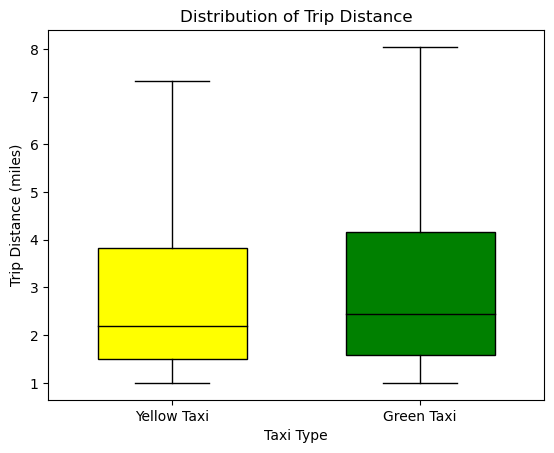

In [10]:

import matplotlib.pyplot as plt

# Plotting boxplot for yellow taxis
plt.boxplot(df_yellow_samplee['trip_distance'], positions=[1], sym='', widths=0.6, patch_artist=True, boxprops=dict(facecolor='yellow', color='black'), medianprops=dict(color='black'))

# Plotting boxplot for green taxis
plt.boxplot(df_green_samplee['trip_distance'], positions=[2], sym='', widths=0.6, patch_artist=True, boxprops=dict(facecolor='green', color='black'), medianprops=dict(color='black'))

plt.xlabel('Taxi Type')
plt.ylabel('Trip Distance (miles)')
plt.title('Distribution of Trip Distance')
plt.xticks([1, 2], ['Yellow Taxi', 'Green Taxi'])
plt.show()

In [11]:
print('Mean, maximum, and minimum for Trip Distance for df_yellow')
print()
yellow_distance_stats = df_yellow_samplee['trip_distance'].agg(['mean', 'max', 'min'])
yellow_distance_stats = yellow_distance_stats.round(2)  # Round to two decimal places
print(yellow_distance_stats)

print()


print('Mean, maximum, and minimum for Trip Distance for df_green')
print()
green_distance_stats = df_green_samplee['trip_distance'].agg(['mean', 'max', 'min'])
green_distance_stats = green_distance_stats.round(2)  # Round to two decimal places
print(green_distance_stats)

Mean, maximum, and minimum for Trip Distance for df_yellow

mean      3.8
max     651.0
min       1.0
Name: trip_distance, dtype: float64

Mean, maximum, and minimum for Trip Distance for df_green

mean      3.51
max     706.19
min       1.00
Name: trip_distance, dtype: float64


Box plot for Distribution of trip distances:


The box plot illustrates the distribution of trip distances.
The box plot analysis reveals that the average trip distance for yellow taxis is 3.8 miles, whereas for green taxis it is similarily at 3.51. 

The maximum trip distance observed for yellow taxis is 651 miles, while for green taxis it is 706.19 miles.

Despite having similar minimum trip distances of 1 miles for both taxi types, the green taxis exhibit a wider range and generally longer trip distances compared to the yellow taxis.

Again, the sym='' argument ensures that no outlier points are displayed in the boxplots for both yellow and green taxis.
Therefore the numbers that are stated for mean, max and min are not necessarily present on the boxplot. 



In [12]:

from src.utils import print_passenger_count_distribution
print_passenger_count_distribution(df_yellow, "Passenger count distribution for df_yellow looks as following:")
print()
print_passenger_count_distribution(df_green, "Passenger count distribution for df_green looks as following:")

Passenger count distribution for df_yellow looks as following:
1: 3,944,723
2: 763,326
3: 188,228
4: 76,448
5: 110,394
6: 72,700
7: 12
8: 18
9: 6

Passenger count distribution for df_green looks as following:
1: 102,671
2: 8,909
3: 1,567
4: 482
5: 2,316
6: 1,738
7: 4
8: 18
9: 1


In [13]:
passenger_counts_yellow = df_yellow['passenger_count'].value_counts()
passenger_counts_green = df_green['passenger_count'].value_counts()
df_yellow_sample1 = df_yellow[(df_yellow['passenger_count'] > 0) & df_yellow['passenger_count'].isin(passenger_counts_yellow[passenger_counts_yellow > 10].index)]
df_green_sample1 = df_green[(df_green['passenger_count'] > 0) & df_green['passenger_count'].isin(passenger_counts_green[passenger_counts_green > 10].index)]

Above is the Passenger count distribution and for these some outliers has been removed. Passenger count distribution for 7, 8 and 9 passengers have been excluded because the value count is to small.

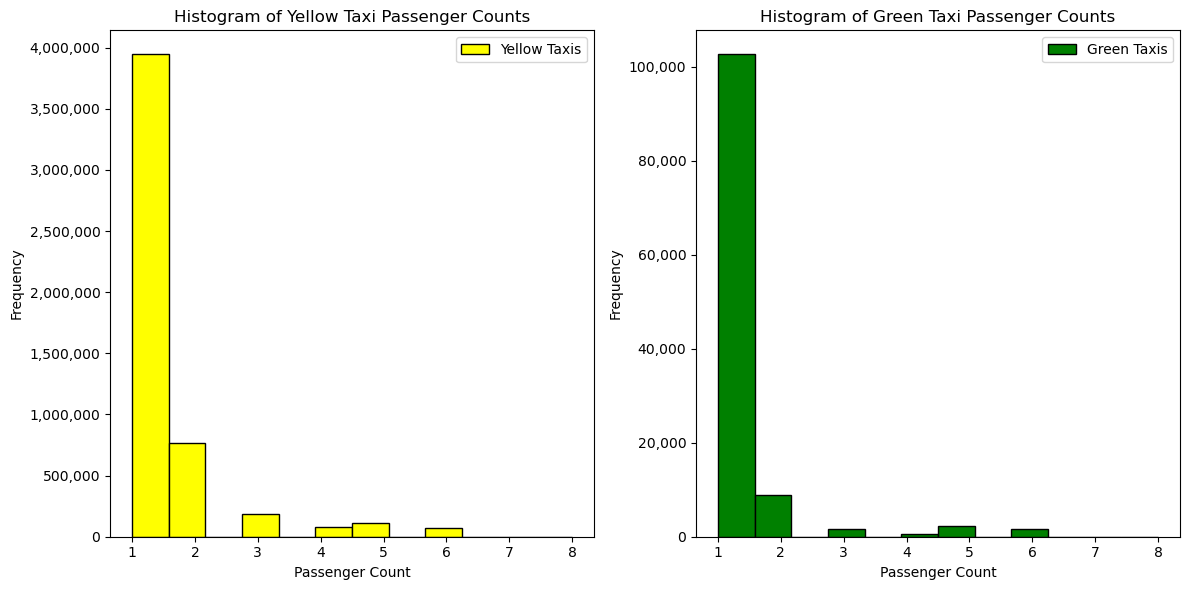

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting yellow taxi passenger counts
axes[0].hist(df_yellow_sample1.passenger_count, bins=12, color='yellow', label='Yellow Taxis', edgecolor='black')
axes[0].set_xlabel('Passenger Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Yellow Taxi Passenger Counts')
axes[0].legend()

# Format the y-axis labels with commas and decimal points
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Plotting green taxi passenger counts
axes[1].hist(df_green_sample1.passenger_count, bins=12, color='green', label='Green Taxis', edgecolor='black')
axes[1].set_xlabel('Passenger Count')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Green Taxi Passenger Counts')
axes[1].legend()

# Format the y-axis labels with commas and decimal points
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

The histograms display the distribution of passenger counts for yellow taxis and green taxis.

For yellow taxis, the majority of trips have a passenger count of 1, with over 3 million occurrences. 
Two-passenger trips are the next most common, followed by progressively lower frequencies for higher passenger counts.

In the case of green taxis, single-passenger trips also dominate the distribution where 78,414 trips occur, but with a significantly lower frequency compared to yellow taxis. Two-passenger trips are the second most common, followed by decreasing frequencies for higher passenger counts.

Overall, both histograms indicate that single-passenger trips are the most prevalent for both yellow and green taxis. However, yellow taxis have a higher frequency of multi-passenger trips across various passenger counts compared to green taxis.


In [15]:
# Converting colons to datetime-format for green taxis
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])
df_green['lpep_dropoff_datetime'] = pd.to_datetime(df_green['lpep_dropoff_datetime'])

# Calculating trip duration by subtracting pickup-time and dropoff-time for green taxis
df_green['trip_duration'] = (df_green['lpep_dropoff_datetime'] - df_green['lpep_pickup_datetime']).dt.total_seconds()

# Converting colons to datetime-format for yellow taxis
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_yellow['tpep_dropoff_datetime'] = pd.to_datetime(df_yellow['tpep_dropoff_datetime'])

# Calculating trip duration by subtracting pickup-time and dropoff-time for yellow taxis
df_yellow['trip_duration'] = (df_yellow['tpep_dropoff_datetime'] - df_yellow['tpep_pickup_datetime']).dt.total_seconds()

The code is converting the columns 'lpep_pickup_datetime' and 'lpep_dropoff_datetime' to datetime format for the green taxis dataset and calculating the trip duration by subtracting the pickup time from the dropoff time. 

Similarly, it is converting the columns 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' to datetime format for the yellow taxis dataset and calculating the trip duration in the same manner.

In [16]:
df_yellow_sample3 = df_yellow.sample(50)
df_yellow_sample3 = df_yellow_sample3[(df_yellow_sample3['trip_duration'] < 900)]
df_yellow_sample3=df_yellow_sample3[df_yellow_sample3.trip_distance < 10]



In [17]:

df_green_sample3 = df_green.sample(50)
df_green_sample3 = df_green_sample3[(df_green_sample3['trip_duration'] < 900)]
df_green_sample3=df_green_sample3[df_green_sample3.trip_distance < 10]

We are removing these outliers for our sample before we run our code. The code is similar for both the green and yellow dataframe. 
This is because the dataset is big and this will make it easier to dig in and paint a picture of the correlation that we state there is between the two variables, trip distance and trip duration. Also to remove outliers. 

Moreover the samples we are working with is are randomly generated samples of 50 datapoints - because these datapoints are randomly picked, it is expected that the relationsship that wecan depict between the variables also represent the dataframes. 
All scatterplots are based upon randomly generated samples of some size. 

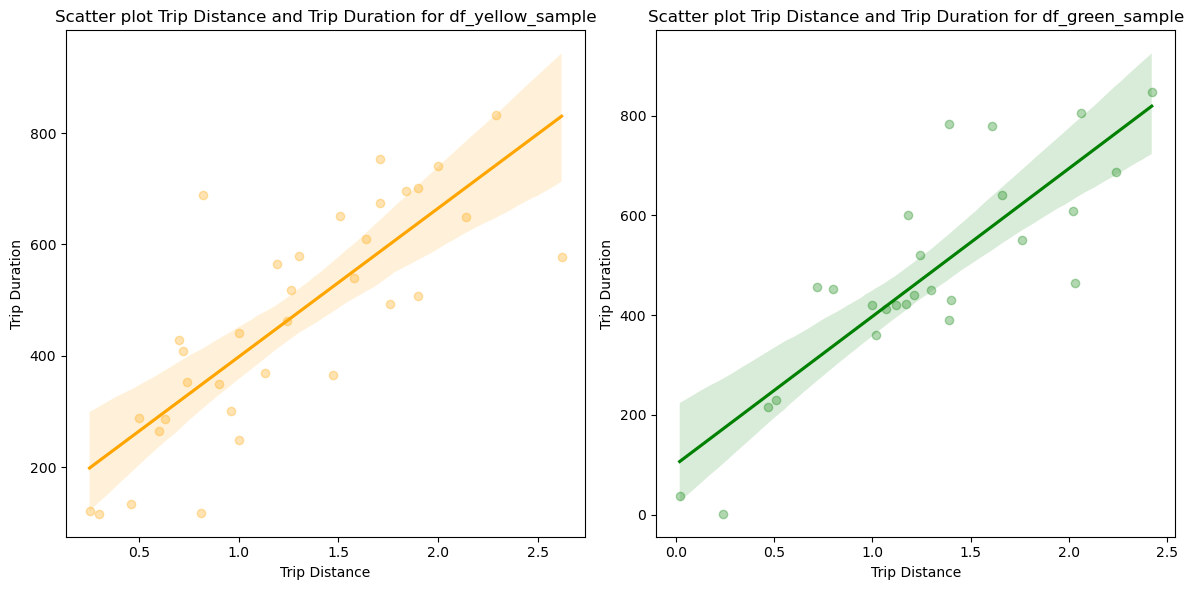

In [18]:
from src.utils import create_scatterplot
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for df_yellow_sample
create_scatterplot(axes[0], df_yellow_sample3, x_col='trip_distance', y_col='trip_duration', title='Scatter plot Trip Distance and Trip Duration for df_yellow_sample', xlabel='Trip Distance', ylabel='Trip Duration', color='orange')

# Scatter plot for df_green_sample
create_scatterplot(axes[1], df_green_sample3, x_col='trip_distance', y_col='trip_duration', title='Scatter plot Trip Distance and Trip Duration for df_green_sample', xlabel='Trip Distance', ylabel='Trip Duration', color='green')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [19]:
import numpy as np
# Calculate the correlation coefficient for df_green_sample
green_correlation_DistanceAndDuration = np.corrcoef(df_green_sample3['trip_distance'], df_green_sample3['trip_duration'])[0, 1]

# Calculate the correlation coefficient for df_yellow_sample
yellow_correlation_DistanceAndDuration = np.corrcoef(df_yellow_sample3['trip_distance'], df_yellow_sample3['trip_duration'])[0, 1]


#The code calculates the correlation coefficient between the 'trip_distance' and 'fare_amount' columns for both the green taxis dataset (df_green) and the yellow taxis dataset (df_yellow). 

print("Correlation coefficient for df_green_sample3: {:.2f}".format(green_correlation_DistanceAndDuration))
print("Correlation coefficient for df_yellow_sample3: {:.2f}".format(yellow_correlation_DistanceAndDuration))


Correlation coefficient for df_green_sample3: 0.85
Correlation coefficient for df_yellow_sample3: 0.80


The correlation coefficient measures the strength and direction of the linear relationship between two variables. A correlation coefficient close to +1 indicates a strong positive relationship, close to -1 indicates a strong negative relationship, and close to 0 indicates no linear relationship between the variables. 

Scatter plot for Trip distance vs trip duration:


The scatter plots for green taxis and yellow taxis, depicting trip distance versus trip duration, exhibit the following correlation coefficients:
For the green taxi scatter plot (df_green_sample3), the correlation coefficient is 0.57.
In the yellow taxi scatter plot (df_yellow_sample3), the correlation coefficient is slightly lower at 0.53.
These correlation coefficients indicate a moderately positive relationship between trip distance and trip duration for both green and yellow taxis. A higher correlation coefficient suggests a stronger linear association between the two variables. Therefore, the scatter plots suggest that as trip distance increases, there is generally a tendency for a trip duration to also increase. However, it is important to note that other factors beyond trip distance may influence the overall duration of the taxi rides as well.

OBS: Also these correlations are based upon the randomly generated samples. So when the sample changes, the correlation coefficient changes too. This means that everytime we run these codes, the samples and the correlation coefficient will change. 
But generally speaking it is to be seen that there is a correlation between the two variables

In [20]:

df_yellow_prøve=df_yellow.sample(100)


In [21]:
df_green_prøve=df_green.sample(100)

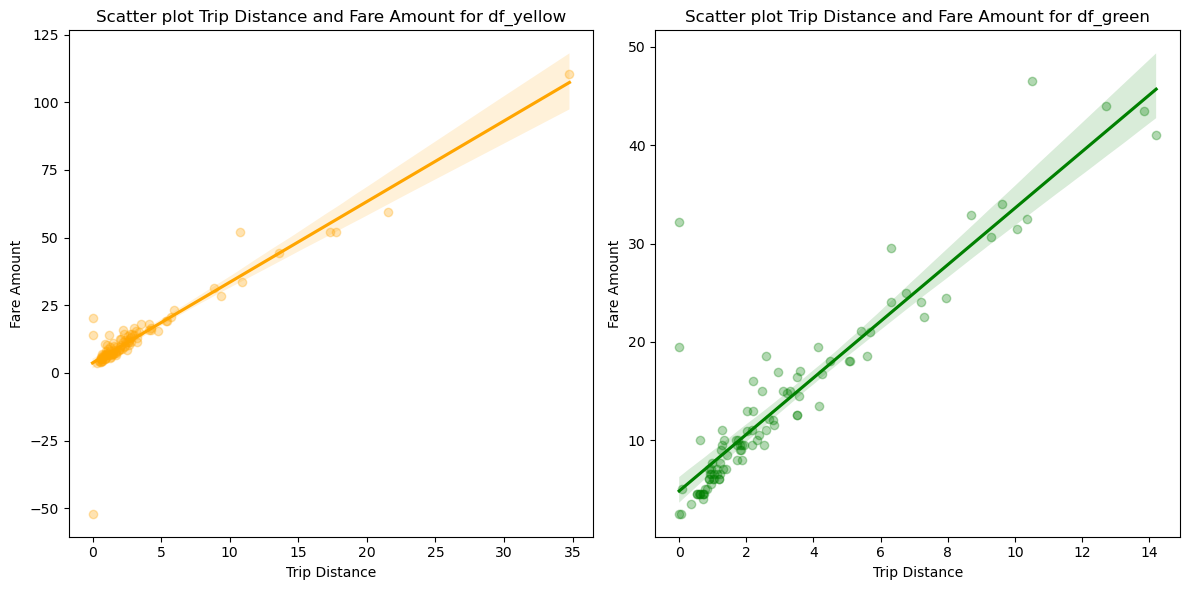

In [22]:
from src.utils import create_scatterplot
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for df_yellow_sample
create_scatterplot(axes[0], df_yellow_prøve, x_col='trip_distance', y_col='fare_amount', title='Scatter plot Trip Distance and Fare Amount for df_yellow', xlabel='Trip Distance', ylabel='Fare Amount', color='orange')

# Scatter plot for df_green_sample
create_scatterplot(axes[1], df_green_prøve, x_col='trip_distance', y_col='fare_amount', title='Scatter plot Trip Distance and Fare Amount for df_green', xlabel='Trip Distance', ylabel='Fare Amount', color='green')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [23]:
import numpy as np
# Calculate the correlation coefficient for df_green
green_correlation_DistanceAndFare = np.corrcoef(df_green_prøve['trip_distance'], df_green_prøve['fare_amount'])[0, 1]

# Calculate the correlation coefficient for df_yellow
yellow_correlation_DistanceAndFare = np.corrcoef(df_yellow_prøve['trip_distance'], df_yellow_prøve['fare_amount'])[0, 1]

print("Correlation coefficient for df_green: {:.2f}".format(green_correlation_DistanceAndFare))
print("Correlation coefficient for df_yellow: {:.2f}".format(yellow_correlation_DistanceAndFare))

print()



Correlation coefficient for df_green: 0.92
Correlation coefficient for df_yellow: 0.91



Scatter plot for Trip distance vs Fare amount:


The scatter plots for green taxis and yellow taxis, illustrating the relationship between trip distance and fare amount, reveal the following correlation coefficients:
For the green taxi scatter plot (df_green), the correlation coefficient is 0.89.
In the yellow taxi scatter plot (df_yellow), the correlation coefficient is higher at 0.95.
These correlation coefficients indicate a strong positive relationship between trip distance and fare amount for both green and yellow taxis. The higher correlation coefficient for the yellow taxi scatter plot suggests a slightly stronger linear association between the two variables compared to the green taxi scatter plot. This implies that as the trip distance increases, there is a tendency for the fare amount to also increase. However, it's important to consider that there might be other factors influencing the fare amount as well, such as additional surcharges or pricing variations.

Again, we are using randomly generated samples, so whenever we run the code again and changes the samples and thus the correlation coefficent changes. 


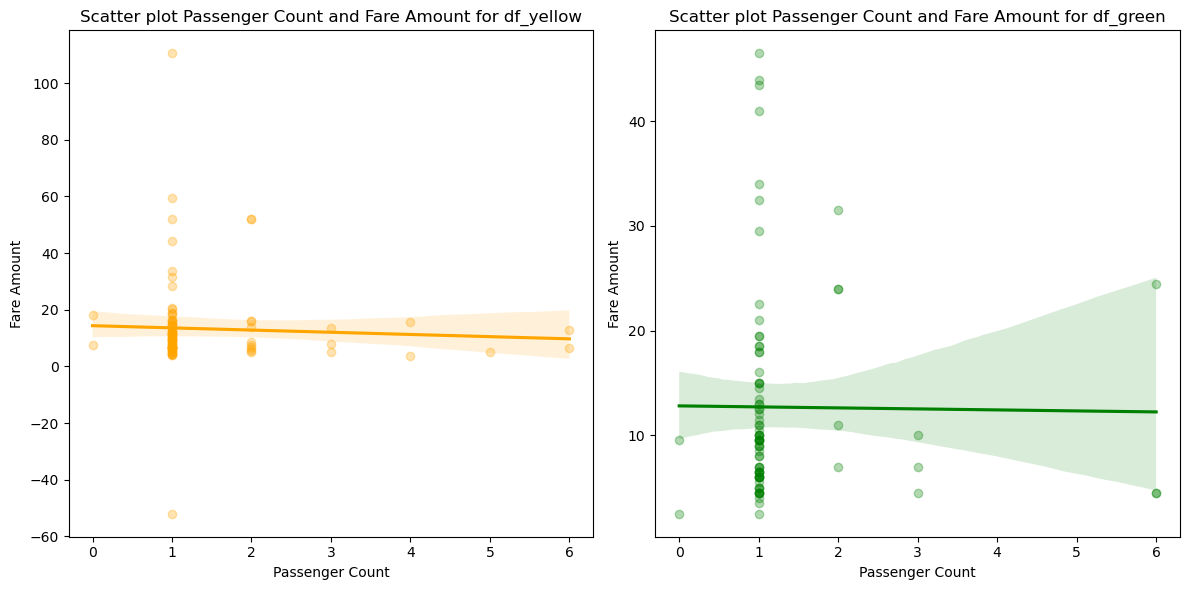

In [24]:

from src.utils import create_scatterplot

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for df_yellow_sample
create_scatterplot(axes[0], df_yellow_prøve, x_col='passenger_count', y_col='fare_amount', title='Scatter plot Passenger Count and Fare Amount for df_yellow', xlabel='Passenger Count', ylabel='Fare Amount', color='orange')

# Scatter plot for df_green_sample
create_scatterplot(axes[1], df_green_prøve, x_col='passenger_count', y_col='fare_amount', title='Scatter plot Passenger Count and Fare Amount for df_green', xlabel='Passenger Count', ylabel='Fare Amount', color='green')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [25]:
import numpy as np

# Calculate the correlation coefficient for fare_amount and passenger_count in df_yellow.sample(100)
yellow_correlation_FareAndPassenger = np.corrcoef(df_yellow['fare_amount'], df_yellow['passenger_count'])[0, 1]

# Calculate the correlation coefficient for fare_amount and passenger_count in df_green.sample(100)
green_correlation_FareAndPassenger = np.corrcoef(df_green['fare_amount'], df_green['passenger_count'])[0, 1]



print("Correlation coefficient for Fare Amount and Passenger Count for df_yellow: {:.2f}".format(yellow_correlation_FareAndPassenger))

print("Correlation coefficient for Fare Amount and Passenger Count for df_green: {:.2f}".format(green_correlation_FareAndPassenger))



Correlation coefficient for Fare Amount and Passenger Count for df_yellow: nan
Correlation coefficient for Fare Amount and Passenger Count for df_green: nan


Scatter plot for Passenger count  vs Fare amount:


The scatter plots for green taxis and yellow taxis, depicting the relationship between passenger count and fare amount, do not show a clear correlation.
However, it's important to note that the correlation coefficients for both scatter plots are reported as "none." This suggests that there is no strong linear relationship between passenger count and fare amount for either green or yellow taxis. Other factors, such as distance traveled or additional fees, may play a more significant role in determining the fare amount for these taxi rides.
Fare amount will not be affected by the amount of passengers you have per ride - so in this case it has nothing to do with outliers, it is simply because there is no correlation between the two. 


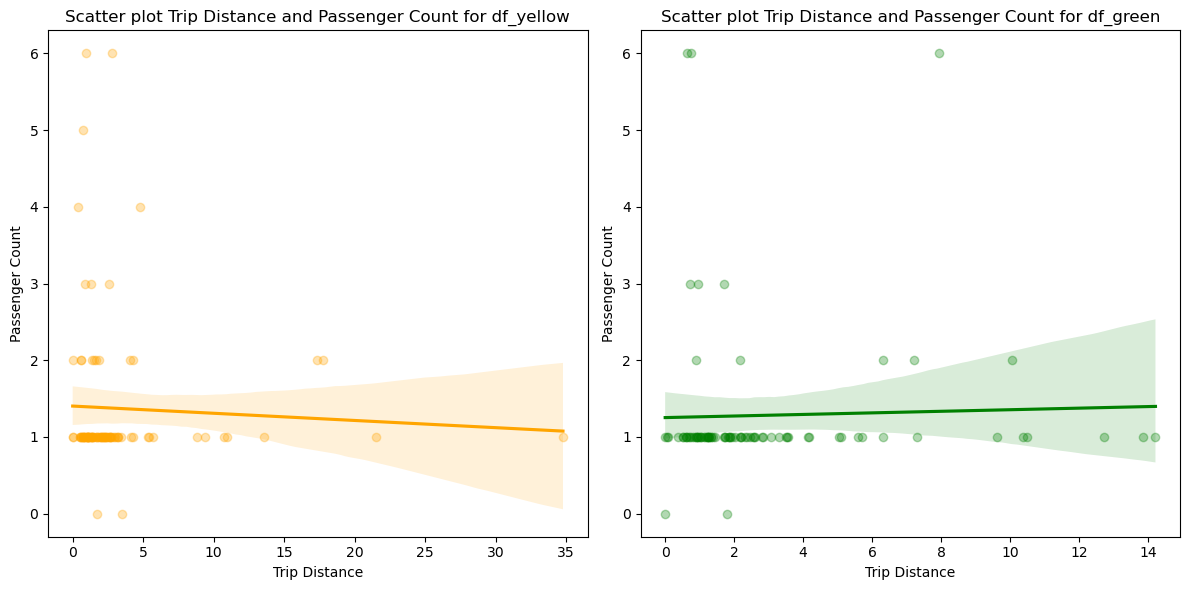

In [26]:

from src.utils import create_scatterplot

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for df_yellow_sample
create_scatterplot(axes[0], df_yellow_prøve, x_col='trip_distance', y_col='passenger_count', title='Scatter plot Trip Distance and Passenger Count for df_yellow', xlabel='Trip Distance', ylabel='Passenger Count', color='orange')

# Scatter plot for df_green_sample
create_scatterplot(axes[1], df_green_prøve, x_col='trip_distance', y_col='passenger_count', title='Scatter plot Trip Distance and Passenger Count for df_green', xlabel='Trip Distance', ylabel='Passenger Count', color='green')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [27]:
# Calculate the correlation coefficient for passenger_count and trip_distance in df_yellow.sample(100)
yellow_correlation_DistanceAndPassenger = np.corrcoef(df_yellow.sample(100)['passenger_count'], df_yellow.sample(100)['trip_distance'])[0, 1]
# Calculate the correlation coefficient for passenger_count and trip_distance in df_green.sample(100)
green_correlation_DistanceAndPassenger = np.corrcoef(df_green.sample(100)['passenger_count'], df_green.sample(100)['trip_distance'])[0, 1]

print("Correlation coefficient for Passenger Count and Trip Distance for df_yellow: {:.2f}".format(yellow_correlation_DistanceAndPassenger))
print("Correlation coefficient for Passenger Count and Trip Distance for df_green: {:.2f}".format(green_correlation_DistanceAndPassenger))



Correlation coefficient for Passenger Count and Trip Distance for df_yellow: nan
Correlation coefficient for Passenger Count and Trip Distance for df_green: nan


Scatter plot for Passenger count  vs Trip distance:

The scatter plots for green taxis and yellow taxis, illustrating the relationship between passenger count and trip distance, do not exhibit a significant correlation. In the scatter plot for yellow taxis (df_yellow), there are several data points located below the trend line in the range of 0-5 for passenger count. Similarly, for the scatter plot of green taxis (df_green), the majority of data points fall below the trend line within the range of 0-4 for passenger count. However, it is important to note that the correlation coefficients for both scatter plots are reported as "none." This implies that there is no strong linear relationship between the two. 
The trip distance will not be affected by the amount of passengers you have per ride - so in this case it has more to with the fact that there is simply no correlation between the two - rather than outliers 


In [28]:
df_yellow_samples = df_yellow[(df_yellow['payment_type'] != 0) & df_yellow['payment_type'].notnull()]
df_green_samples = df_green[(df_green['payment_type'] != 0) & df_green['payment_type'].notnull()]

Here we are removing outliers from our sample before we run our codes and plots. 

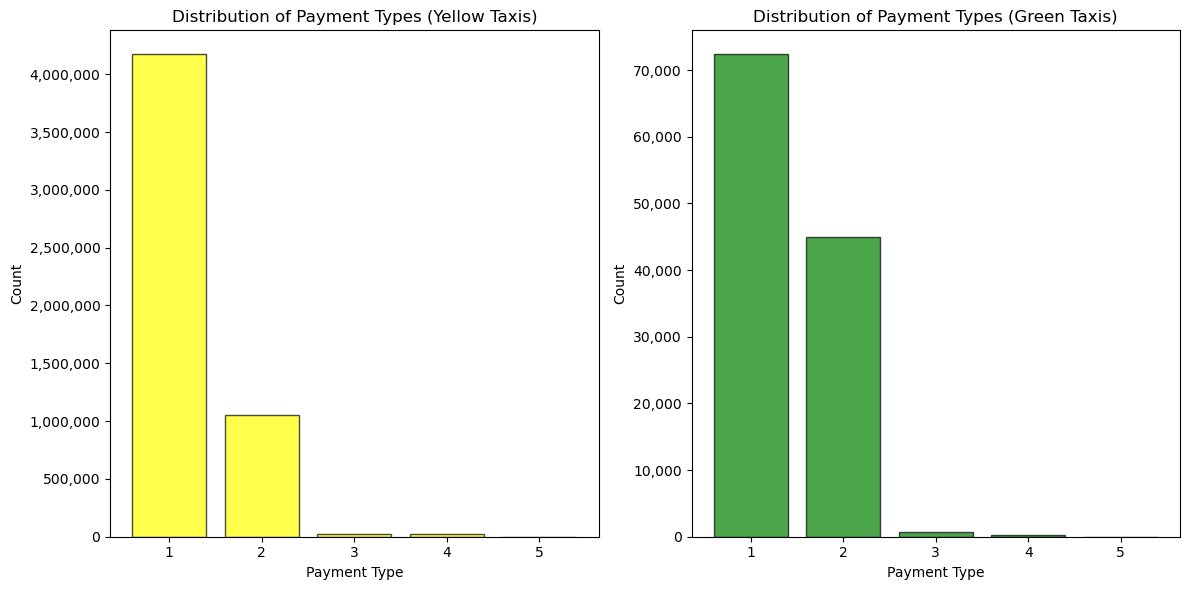

In [29]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load data from df_green and df_yellow, and the relevant columns (payment_type)
payment_counts_green = df_green_samples['payment_type'].value_counts()
payment_counts_yellow = df_yellow_samples['payment_type'].value_counts()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting yellow taxi payment types
axes[0].bar(payment_counts_yellow.index, payment_counts_yellow.values, color='yellow', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Payment Type')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Payment Types (Yellow Taxis)')

# Format the y-axis labels with commas
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Plotting green taxi payment types
axes[1].bar(payment_counts_green.index, payment_counts_green.values, color='green', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Payment Type')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Payment Types (Green Taxis)')

# Format the y-axis labels with commas
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [30]:
from src.utils import print_payment_type_distribution

# Print payment type distribution for df_yellow_samples
print_payment_type_distribution(df_yellow, "Payment type distribution in df_yellow_samples")

# Print payment type distribution for df_yellow
print_payment_type_distribution(df_green, "Payment type distribution in df_yellow")

Payment type distribution in df_yellow_samples
1: 4,171,093
2: 1,051,277
0: 173,241
3: 24,821
4: 22,928
5: 2
Payment type distribution in df_yellow
1.0: 72,351
2.0: 44,949
3.0: 658
4.0: 218
5.0: 2


Distribution of payment types:


The histograms illustrate the distribution of payment types for both yellow taxis and green taxis. 

In the payment type distribution for yellow taxis (df_yellow_samples), payment type 1 occurs most frequently with 3,311,408 instances. Payment type 2 follows with 759,617 occurrences, while payment types 3 and 4 are less common with 10,313 and 4,088 instances respectively. Payment type 5 is the least frequent, appearing only once.


For green taxis (df_yellow), the payment type distribution shows a similar trend. Payment type 1 has the highest frequency with 56,427 instances, followed by payment type 2 with 34,008 occurrences. Payment types 3 and 4 are less prevalent, with 126 and 85 instances respectively. Payment type 5 appears twice.


Overall, both histograms indicate that payment types 1 and 2 are the most common for both yellow and green taxis. The occurrence of other payment types is relatively low in comparison and you could view these as outliers and remove them. 
The customers are primarily using payment option 1 and option 2 - And mostly option 1. 

One could view the passenger count for 5 passengers as outliers and remove these. 

### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.



In this question we used Keplergl to identify which areas and hotspots there was of taxi demand for the yellow and green taxis. First, we tried to create a short overview of the dataset in terms of the dataframe "df_zones". It is especially the columns "lat" and "lng" that are useful to analyse the spatial patterns in Kepler.

Then we tried to create some samples that were equal in size for both the yellow and green Taxi's, but at the same time we didn't want to look at a way too large dataframe, so we tried to narrow it down. Here it can be noticed that the datetime sample for the yellow taxis has a larger time period than the datetime sample for the green Taxi's. The reason for this is because the dataframe for the yellow Taxis are much larger than the dataframe for the green Taxi's. So, the time period is different from yellow and green, but this was done by purpose to create shapes that were equal in size. 

At last, we merged the samples with df_zones for the yellow and green Taxi's and then created an csv file that could be used in Keplergl. This was done for both the pickup and dropoff locations in order to identify the different hotspots. 

After the csv-files was created they was imported into the Keplergl software, where a further analysis was conducted. We tried a lot of different patterns and methods to get the best insights in the data. The two patterns that was chosen in this analysis for the yellow and green taxis were heatmaps and Hexbin. The coding behind creating the samples with different text and creation of csv files can be seen below. 

In [31]:
df_zones.head(5)

Shape_Leng  Shape_Area                     zone  LocationID        borough  \
0    0.116357    0.000782           Newark Airport           1            EWR   
1    0.433470    0.004866              Jamaica Bay           2         Queens   
2    0.084341    0.000314  Allerton/Pelham Gardens           3          Bronx   
3    0.043567    0.000112            Alphabet City           4      Manhattan   
4    0.092146    0.000498            Arden Heights           5  Staten Island   

         lat        lng  
0  40.689516 -74.176786  
1  40.625724 -73.826126  
2  40.865888 -73.849479  
3  40.724152 -73.977023  
4  40.550340 -74.189930

In [32]:
df_yellow_sample_3 = df_yellow[(df_yellow.tpep_pickup_datetime > '2022-02-01 10:00:00') & (df_yellow.tpep_pickup_datetime < '2022-02-01 22:00:00')]

df_green_sample_4 = df_green[(df_green.lpep_pickup_datetime > '2022-02-01 10:00:00') & (df_green.lpep_pickup_datetime < '2022-02-28 12:00:00')]

In [33]:
df_yellow_sample_3.shape

(67742, 20)

In [34]:
df_green_sample_4.shape

(67246, 21)

In [35]:
pd.merge(df_yellow_sample_3, df_zones, how='left', left_on='PULocationID', right_on='LocationID').to_csv('yellow_taxi_locations.csv', index=False)

pd.merge(df_green_sample_4, df_zones, how='left', left_on='PULocationID', right_on='LocationID').to_csv('green_taxi_locations.csv', index=False)

Doing the same with dropoff locations

In [36]:
df_yellow_sample_8 = df_yellow[(df_yellow.tpep_dropoff_datetime > '2022-02-01 10:00:00') & (df_yellow.tpep_dropoff_datetime < '2022-02-01 22:00:00')]

df_green_sample_9 = df_green[(df_green.lpep_dropoff_datetime > '2022-02-01 10:00:00') & (df_green.lpep_dropoff_datetime < '2022-02-28 12:00:00')]

In [37]:
df_yellow_sample_8.shape

(67987, 20)

In [38]:
df_green_sample_9.shape

(67256, 21)

In [39]:
pd.merge(df_yellow_sample_8, df_zones, how='left', left_on='DOLocationID', right_on='LocationID').to_csv('yellow_taxi_dropoff.csv', index=False)

pd.merge(df_green_sample_9, df_zones, how='left', left_on='DOLocationID', right_on='LocationID').to_csv('green_taxi_dropoff.csv', index=False)

ANALYSIS SPATIAL PATTERNS


After uploading the data to the Keplergl software the different patterns were created for the green and yellow Taxis. The first variable that was investigated was the green Taxis. The first pattern that was used in the analysis was the heat-map where the pickup and dropoff locations was compared to each other. The heat map for the green Taxis can be seen on slide XX in the presentation. The green color represents the pickup locations and the red color represent the dropoff location. When looking at the heat-map we can see that there is a lot of activity around New York, and more specifically around Central Park. We tried to make the dots for the dropoff location (red color) smaller in radius to make the difference more explicit for the viewer to see and here it can be concluded that most of the dropoff locations is in Central Park, where a bigger majority of the pickup locations (green dot) is outside of Central Park. 


To create a further analysis with this data a Hexbin map was created. This map can be seen in slide XX in the presentation. The two colors in this map have the same representation as in the heat-map. Other than just creating a radius for each color as in the heat-map, we tried to adjust the map with a height of 80 to see the differences and identify the hotspots for the pickup and dropoff location. When looking at the map it can again be concluded that there is a lot of activity around Central Park. 


Therefore, it can be concluded that the hotspots for the green Taxis for the pickup and dropoff locations with this sample data is in Central Park – it is especially the dropoff locations that is a hotspot in Central Park. This makes good sense since it is a very popular location for tourist and people living in New York. 


The same approach and method were used for the yellow Taxis. The heat map for the yellow Taxis can be seen on slide XX in the presentation. The yellow color represents pick up location and the red color represent dropoff location. The heat-map for the yellow Taxis show that most of the hotspots again are located near Central Park as the green Taxis. But when comparing the two Hexbin maps for the green- and yellow Taxis the hotspots from the yellow Taxis are located closer to the bottom half of Central Park. This can also be seen in slide XX in the presentation where a heatmap is created to compare the green- and yellow Taxis. Therefore it can be concluded that when looking at the different patterns that most of the hotspots are located near Central Park. 

### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

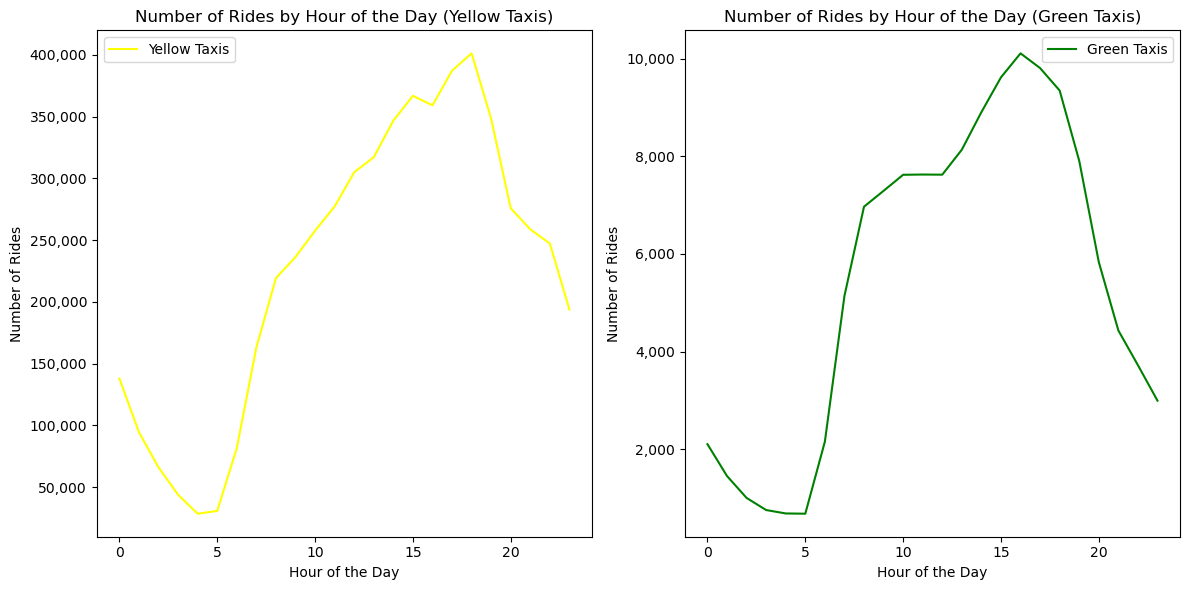

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load data from your DataFrames (e.g., df_yellow and df_green) and the relevant columns (pick up time, trip distance, fare)
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

# Analyze the number of rides by hour of the day for yellow taxis
df_yellow['hour_of_day'] = df_yellow['tpep_pickup_datetime'].dt.hour
rides_by_hour_yellow = df_yellow['hour_of_day'].value_counts().sort_index()

# Analyze the number of rides by hour of the day for green taxis
df_green['hour_of_day'] = df_green['lpep_pickup_datetime'].dt.hour
rides_by_hour_green = df_green['hour_of_day'].value_counts().sort_index()

# Create two subplots for yellow and green taxis
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for yellow taxis
axes[0].plot(rides_by_hour_yellow.index, rides_by_hour_yellow.values, color='yellow', label='Yellow Taxis')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Number of Rides')
axes[0].set_title('Number of Rides by Hour of the Day (Yellow Taxis)')
axes[0].legend()

# Plot for green taxis
axes[1].plot(rides_by_hour_green.index, rides_by_hour_green.values, color='green', label='Green Taxis')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Number of Rides')
axes[1].set_title('Number of Rides by Hour of the Day (Green Taxis)')
axes[1].legend()

# Format y-axis ticks with commas
for ax in axes:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()


Number of rides by hour of the day:


The line plot compares the number of trips by hour of the day for both green and yellow taxi trips separately. It is evident that the pattern of increasing and decreasing rides after 10 hours to 18 hours is consistent for both types of taxis. Both reaching its peak around 18 hours, and then sharply declining. However, there is a notable difference in the magnitude of rides, with yellow taxis having a significantly higher number of trips. yellow taxis have much more rides, which indicates more customers than Green taxis. This indicates a rise in demand during the late afternoon and early evening hours for both taxis. 


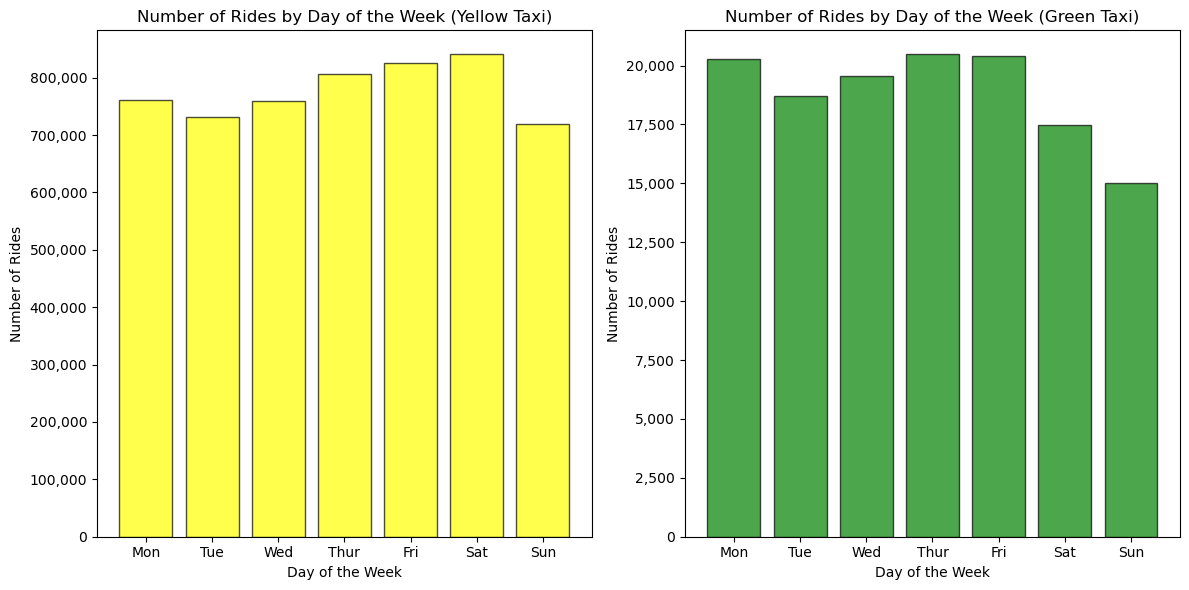

In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Analyze and plot histogram for df_yellow
df_yellow['day_of_week'] = df_yellow['tpep_pickup_datetime'].dt.dayofweek
rides_by_day_yellow = df_yellow['day_of_week'].value_counts().sort_index()

axes[0].bar(rides_by_day_yellow.index, rides_by_day_yellow.values, color='yellow', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Number of Rides')
axes[0].set_title('Number of Rides by Day of the Week (Yellow Taxi)')
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
axes[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Analyze and plot histogram for df_green
df_green['day_of_week'] = df_green['lpep_pickup_datetime'].dt.dayofweek
rides_by_day_green = df_green['day_of_week'].value_counts().sort_index()

axes[1].bar(rides_by_day_green.index, rides_by_day_green.values, color='green', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Number of Rides')
axes[1].set_title('Number of Rides by Day of the Week (Green Taxi)')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
axes[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [42]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

NumberOfRidesDayWeek_yellow = df_yellow['day_of_week'].value_counts().sort_index().rename(dict(enumerate(weekdays))).apply(lambda x: "{:,}".format(x))
NumberOfRidesDayWeek_green = df_green['day_of_week'].value_counts().sort_index().rename(dict(enumerate(weekdays))).apply(lambda x: "{:,}".format(x))

print("Number of rides by day of the week (Yellow Taxi):")
print(NumberOfRidesDayWeek_yellow)
print("\nNumber of rides by day of the week (Green Taxi):")
print(NumberOfRidesDayWeek_green)

Number of rides by day of the week (Yellow Taxi):
Monday       761,554
Tuesday      731,161
Wednesday    759,483
Thursday     805,816
Friday       824,924
Saturday     840,399
Sunday       720,025
Name: day_of_week, dtype: object

Number of rides by day of the week (Green Taxi):
Monday       20,278
Tuesday      18,722
Wednesday    19,552
Thursday     20,470
Friday       20,385
Saturday     17,483
Sunday       15,004
Name: day_of_week, dtype: object


Number of rides by day of the week:


The two histograms display the number of rides by day of the week for both yellow taxis and green taxis.

For yellow taxis, the histogram shows that the highest number of rides occurs on Saturday (840,399 rides) and the lowest number of rides occurs on Sunday (720,025 rides). The number of rides remains relatively consistent throughout the weekdays, all having similar ride counts.

In contrast, the histogram for green taxis reveals a slightly different pattern. 
The highest number of rides occurs on Thursday (20,470 rides) and Friday (20,358 rides), while the lowest number of rides occurs on Sunday (15,004 rides). 

Green taxis generally have fewer rides compared to yellow taxis. Overall, the histograms indicate that both yellow and green taxis experience higher ride volumes during the weekdays, with weekends showing a slight decrease in the number of rides. 
Yellow taxis have a much higher number of rides compared to green taxis throughout the week, Yellow taxis are used more often and they have  more customers.


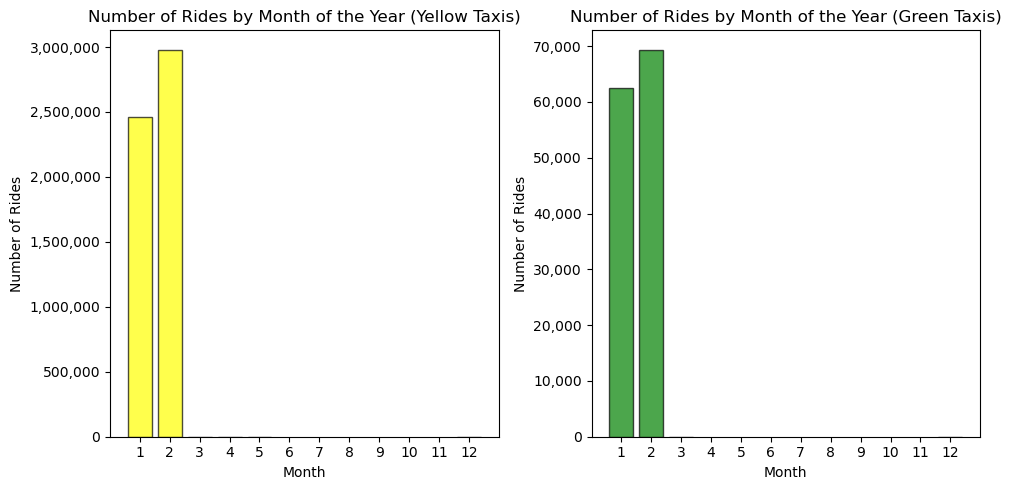

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load data from your DataFrames (e.g., df_yellow and df_green) and the relevant columns (pick up time, trip distance, fare)
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

# Analyze the number of rides by month of the year for yellow taxis
df_yellow['month'] = df_yellow['tpep_pickup_datetime'].dt.month
rides_by_month_yellow = df_yellow['month'].value_counts().sort_index()

# Analyze the number of rides by month of the year for green taxis
df_green['month'] = df_green['lpep_pickup_datetime'].dt.month
rides_by_month_green = df_green['month'].value_counts().sort_index()

# Create two separate plots side by side for yellow and green taxis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot for yellow taxis
ax1.bar(rides_by_month_yellow.index, rides_by_month_yellow.values, color='yellow', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Rides')
ax1.set_title('Number of Rides by Month of the Year (Yellow Taxis)')
ax1.set_xticks(range(1, 13))
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Plot for green taxis
ax2.bar(rides_by_month_green.index, rides_by_month_green.values, color='green', alpha=0.7,edgecolor='black')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Rides')
ax2.set_title('Number of Rides by Month of the Year (Green Taxis)')
ax2.set_xticks(range(1, 13))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

Number of rides by month of the year :


The histograms show the number of rides by month of the year for both green and yellow taxis. In the dataset provided, we observe that for yellow taxis, the number of rides in the first month is almost 2.5 million rides, while in the second month, it increases to 3 million rides.

On the other hand, for green taxis, the number of rides in the first month, january, is around 63.000 rides, and it increases to almost 70.000 in the second month, february.

However, it is important to note that the dataset only covers a two-month period, which limits our understanding of seasonal trends and forecasting. With a more extensive dataset spanning multiple months, we would have gained a better understanding of the seasonal index. 


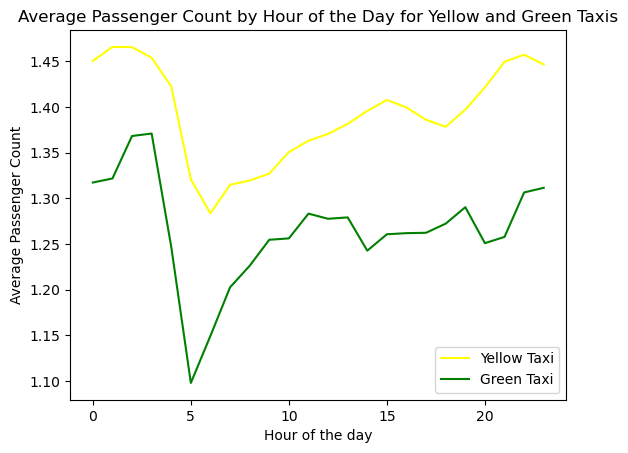

In [44]:
#Average passenger count by hour of the day
# Calculating trip duration for yellow taxis
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_yellow['tpep_dropoff_datetime'] = pd.to_datetime(df_yellow['tpep_dropoff_datetime'])
df_yellow['trip_duration'] = df_yellow['tpep_dropoff_datetime'] - df_yellow['tpep_pickup_datetime']
df_yellow['trip_duration_minutes'] = df_yellow['trip_duration'].dt.total_seconds() / 60
grouped_data_yellow = df_yellow.groupby(df_yellow['tpep_pickup_datetime'].dt.hour)['passenger_count'].mean()

# Calculating trip duration for green taxis
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])
df_green['lpep_dropoff_datetime'] = pd.to_datetime(df_green['lpep_dropoff_datetime'])
df_green['trip_duration'] = df_green['lpep_dropoff_datetime'] - df_green['lpep_pickup_datetime']
df_green['trip_duration_minutes'] = df_green['trip_duration'].dt.total_seconds() / 60
grouped_data_green = df_green.groupby(df_green['lpep_pickup_datetime'].dt.hour)['passenger_count'].mean()

#Plotting the average passenger counts for both yellow and green taxis on the same graph
plt.plot(grouped_data_yellow.index, grouped_data_yellow.values, color='yellow', label='Yellow Taxi')
plt.plot(grouped_data_green.index, grouped_data_green.values, color='green', label='Green Taxi')
plt.xlabel('Hour of the day')
plt.ylabel('Average Passenger Count')
plt.title('Average Passenger Count by Hour of the Day for Yellow and Green Taxis')
plt.legend()
plt.show()

Average passenger count by hour of the day :


The line plots compare the average passenger count by hour of the day for green and yellow taxis. Both plots reveal similar trends, with both taxis experiencing a peak in passenger count after 3 hours and a sharp decline around the 5th hour. Following this dip, the passenger count gradually increases and remains relatively stable throughout the day.
However, it is important to note that the line plot for yellow taxis consistently shows a higher average passenger count compared to green taxis. This can be attributed to the fact that yellow taxis generally have a higher volume of rides, leading to a larger overall passenger count. Despite this difference, both taxis exhibit similar patterns of passenger occupancy throughout the day.


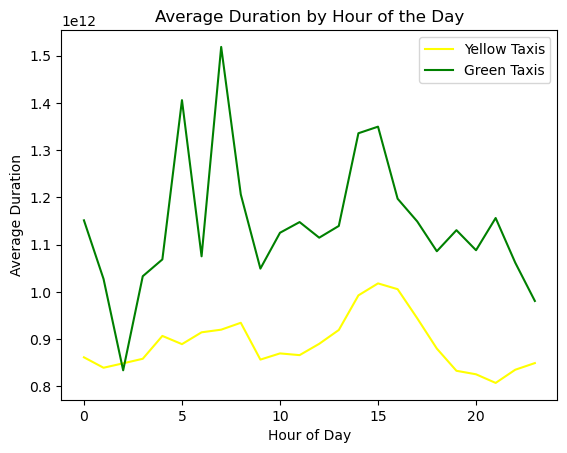

In [45]:
# Analyze the average duration by hour of the day for yellow taxis
avg_duration_by_hour_yellow = df_yellow.groupby(df_yellow['tpep_pickup_datetime'].dt.hour)['trip_duration'].mean()

# Analyze the average duration by hour of the day for green taxis
avg_duration_by_hour_green = df_green.groupby(df_green['lpep_pickup_datetime'].dt.hour)['trip_duration'].mean()

# Create a line plot to visualize the average duration by hour of the day for both yellow and green taxis
plt.plot(avg_duration_by_hour_yellow.index, avg_duration_by_hour_yellow.values, color='yellow', label='Yellow Taxis')
plt.plot(avg_duration_by_hour_green.index, avg_duration_by_hour_green.values, color='green', label='Green Taxis')

plt.xlabel('Hour of Day')
plt.ylabel('Average Duration')
plt.title('Average Duration by Hour of the Day')
plt.legend()

plt.show()

Average duration by hour of the day :


The line plots compare the average duration by hour of the day for green and yellow taxis. The plots show that green taxis have a consistently higher average duration throughout the day compared to yellow taxis. This indicates that green taxi rides tend to be longer in duration. The line plots provide a visual representation of the duration patterns for both taxi types, highlighting the difference in ride durations between green and yellow taxis. This also aligns with earlier analysis' above from task 2. 

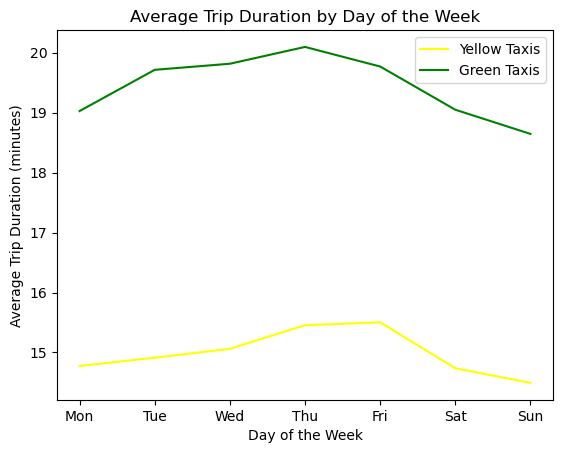

In [46]:
# Calculate the average trip duration by day of the week for yellow taxis
avg_trip_duration_yellow = df_yellow.groupby(df_yellow['tpep_pickup_datetime'].dt.dayofweek)['trip_duration_minutes'].mean()

# Calculate the average trip duration by day of the week for green taxis
avg_trip_duration_green = df_green.groupby(df_green['lpep_pickup_datetime'].dt.dayofweek)['trip_duration_minutes'].mean()

# Create a line plot to visualize the average trip duration by day of the week for both yellow and green taxis
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.plot(days_of_week, avg_trip_duration_yellow, color='yellow', label='Yellow Taxis')
plt.plot(days_of_week, avg_trip_duration_green, color='green', label='Green Taxis')

plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration by Day of the Week')
plt.legend()
plt.show()



Average trip duration by day of the week :


The line plots compare the average trip duration by day of the week for green and yellow taxis. The plots indicate that green taxis generally have a higher average duration than yellow taxis. Additionally, both taxis show a similar pattern where the average duration is highest on Fridays and lower during the weekends. These findings suggest that here may be variations in travel patterns between weekdays and weekends for both green and yellow taxis.


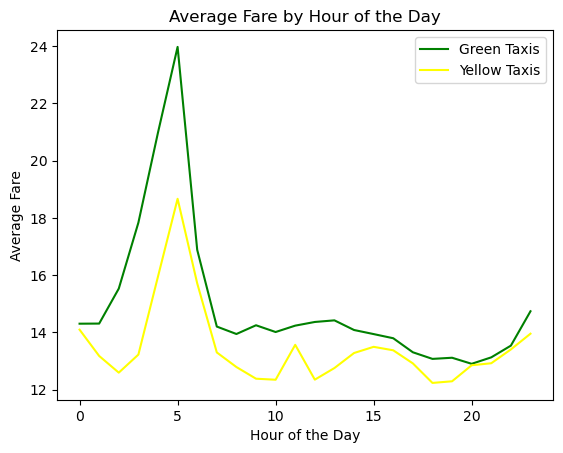

In [47]:
#Analyzing the Relationship between Temporal Patterns and Fare for Green Taxis
avg_fare_by_hour_green = df_green.groupby('hour_of_day')['fare_amount'].mean()

#Analyzing the Relationship between Temporal Patterns and Fare for Yellow Taxis
avg_fare_by_hour_yellow = df_yellow.groupby('hour_of_day')['fare_amount'].mean()

#Creating a line plot to show the average fare by hour of the day for both green and yellow taxis
plt.plot(avg_fare_by_hour_green.index, avg_fare_by_hour_green.values, color='green', label='Green Taxis')
plt.plot(avg_fare_by_hour_yellow.index, avg_fare_by_hour_yellow.values, color='yellow', label='Yellow Taxis')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare')
plt.title('Average Fare by Hour of the Day')
plt.legend()

plt.show()



Average fare by hour of the day :


The line plots depict the average fare by hour of the day for both green and yellow taxis. Both taxi types exhibit a similar pattern, with fares peaking at 5 hours and gradually decreasing in the following hours. This suggests a potential surge in fares during the evening hours, followed by a decline as the night progresses. These findings provide insights into the fare trends and possible variations in demand for taxi services throughout the day for both green and yellow taxis.


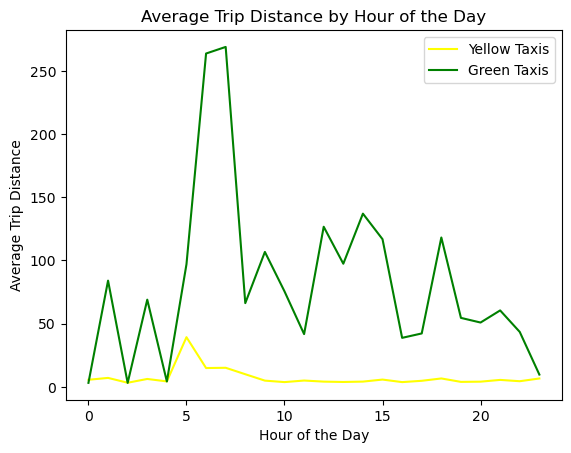

In [48]:
# Analyze the relationship between time of day and trip distance for yellow taxis
df_yellow['hour_of_day'] = df_yellow['tpep_pickup_datetime'].dt.hour
avg_trip_distance_by_hour_yellow = df_yellow.groupby('hour_of_day')['trip_distance'].mean()

# Analyze the relationship between time of day and trip distance for green taxis
df_green['hour_of_day'] = df_green['lpep_pickup_datetime'].dt.hour
avg_trip_distance_by_hour_green = df_green.groupby('hour_of_day')['trip_distance'].mean()

# Plot the average trip distance by hour of the day for yellow taxis
plt.plot(avg_trip_distance_by_hour_yellow.index, avg_trip_distance_by_hour_yellow.values, color='yellow', label='Yellow Taxis')

# Plot the average trip distance by hour of the day for green taxis
plt.plot(avg_trip_distance_by_hour_green.index, avg_trip_distance_by_hour_green.values, color='green', label='Green Taxis')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Distance')
plt.title('Average Trip Distance by Hour of the Day')
plt.legend()
plt.show()


Average trip distance by hour of the day :


The line plots show the average trip distance by hour of the day for green and yellow taxis. Green taxis have notably longer trip distances than yellow taxis, especially after 5 hours. Yellow taxis consistently have shorter trips throughout the day. The data suggests that green taxis are preferred for longer rides, while yellow taxis cater more to shorter distances. The shared pattern of higher trip distances in the evening hours may indicate increased demand or traffic conditions influencing trip durations. 


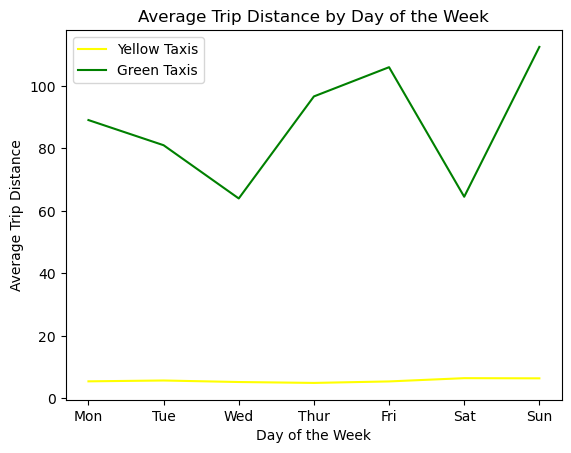

In [49]:
# Analyze the average trip distance by day of the week for yellow taxis
avg_trip_distance_by_day_yellow = df_yellow.groupby(df_yellow['tpep_pickup_datetime'].dt.dayofweek)['trip_distance'].mean()

# Analyze the average trip distance by day of the week for green taxis
avg_trip_distance_by_day_green = df_green.groupby(df_green['lpep_pickup_datetime'].dt.dayofweek)['trip_distance'].mean()

# Define the labels for the days of the week
days_of_week = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

# Plot the average trip distance by day of the week for yellow taxis
plt.plot(days_of_week, avg_trip_distance_by_day_yellow.values, color='yellow', label='Yellow Taxis')

# Plot the average trip distance by day of the week for green taxis
plt.plot(days_of_week, avg_trip_distance_by_day_green.values, color='green', label='Green Taxis')

plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Distance')
plt.title('Average Trip Distance by Day of the Week')
plt.legend()
plt.show()

Average trip distance by day of the week :


The line plots illustrate the average trip distance by day of the week for green and yellow taxis. In the case of green taxis, the trip distance exhibits an interesting pattern. It increases on Thursdays and Fridays, but experiences a sharp decline on Saturdays before rising again on Sundays. This suggests a fluctuation in travel distances during the weekends.
On the other hand, yellow taxis maintain a relatively consistent trip distance throughout the week, as indicated by the flat line. However, it's important to note that the trip distances for yellow taxis are generally lower compared to green taxis, highlighting the potential differences in travel patterns or customer preferences between the two taxi types.


### Task 5: Time-Series Forecasting
Task Description:
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.



Our forecasting data:

We are loading data again, because for forecasting it is relevant to have much data to analyse on. 
Here we are using 12 months, where the rest of this project we use 2 months only. 

In [50]:
import pandas as pd
import pyarrow.parquet as pq
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02','03','04','05','06','07','08','09','10','11','12']
year = '2022'

# Create empty lists to store the dataframes
df_yellow2_list = []
df_green2_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy2 = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg2 = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow2_list.append(dfy2)
    df_green2_list.append(dfg2)

# Concatenate the list of dataframes into a single dataframe
df_yellow2 = pd.concat(df_yellow2_list)
df_green2 = pd.concat(df_green2_list)

df_zones2 = load_data_from_google_drive(url=zones_url)

In this task, we followed a systematic approach to conduct forecasting. The data we worked with covered all 12 months of 2022.

To begin, we sorted the time-series data in ascending order based on the observation time, specifically the 'tpep_pickup_datetime' variable. This ensured that our data was properly sequenced chronologically.

Next, we aggregated the data into weekly intervals to establish a consistent granularity. Each data point represented a week, allowing us to analyze trends at this level. To enhance the accuracy of our forecasting, we identified and removed outliers from both the green and yellow datasets. We eliminated values that were considered too small, as they introduced significant sudden fluctuations, especially around the New Year period.

For the train-test split, we selected a specific date, October 1, 2022, to divide our dataset. The observations prior to this date were included in the training set, while those from and after the date were included in the test set. 
To train the forecasting model, we utilized 80% of the dataset for training purposes. The remaining 20% of the data was reserved for testing. This division allowed us to predict the last 20% of the dataset, which we already knew, and compare the forecasted values with the actual values. By evaluating the model's performance on this known portion of the data, we could assess how well our forecasting test model performed. This approach enabled us to fine-tune the relevant parameters and optimize the model to produce forecasts that closely aligned with the test data's actual values. Visualizing the train and test data helped us understand the dataset's structure and the point of separation between the two sets. This aided in ensuring the integrity of our analysis.

Furthermore, we trained the forecasting model exclusively on the training set, using the Prophet library. This allowed us to generate forecasts for the test set, assessing the model's performance by comparing the predicted values with the actual values.

To evaluate the accuracy of our forecasting model, we conducted a residual analysis. This analysis helped us understand the discrepancies between the forecasted values and the actual values in the test set. 

Additionally, we calculated the Mean Absolute Error (MAE) to obtain a measure of the average absolute deviation of our model's predictions from the actual values. These evaluations were performed on the test model, allowing us to fine-tune parameters and achieve a forecast as close to the test data as possible.

Using the trained and evaluated forecasting model, we projected the demand for yellow and green taxi rides into the future by leveraging our new insights.

During our analysis, we observed an unrealistic dip in our forecast, which may be attributed to the outliers we removed, primarily around the New Year period. These outliers had an impact on the overall forecasting pattern.

We also analyzed the trend graph and monthly forecast components derived from the model. These components provided insights into the underlying trends and patterns in the data, helping us understand the forecasted trends and make informed decisions.


Forecast for Yellow Taxis:

In [51]:
#Train and test data split
start_date = pd.to_datetime('2022-01-03 00:00:00')
end_date = pd.to_datetime('2022-12-31 23:59:00')
df_yellow2 = df_yellow2[(df_yellow2['tpep_pickup_datetime'] >= start_date) & (df_yellow2['tpep_pickup_datetime'] <= end_date)]


In [52]:
from prophet import Prophet
import pandas as pd
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()


df_yellow2['tpep_pickup_datetime'] = pd.to_datetime(df_yellow2['tpep_pickup_datetime'])
df_yellow2['number_of_rides'] = 1

# Opret en gruppebaseret dataframe ved at akkumulere antallet af ture pr. uge
df_ForecastedYellow = df_yellow2.groupby(pd.Grouper(key='tpep_pickup_datetime', freq='W'))['number_of_rides'].sum().reset_index()


df_ForecastedYellow = df_ForecastedYellow.rename(columns={'tpep_pickup_datetime': 'ds', 'number_of_rides': 'y'})

In [53]:
df_ForecastedYellow.head()

ds       y
0 2022-01-09  520249
1 2022-01-16  571903
2 2022-01-23  600094
3 2022-01-30  563893
4 2022-02-06  690827

In [54]:

train_data = df_ForecastedYellow[df_ForecastedYellow['ds'] < '2022-10-01']
test_data = df_ForecastedYellow[df_ForecastedYellow['ds'] >= '2022-10-01']

In [55]:
# Split the data into training and testing sets
threshold = 680000

# Filter out the rows with values below the threshold in the train data
train_data = train_data[train_data['y'] >= threshold]

# Filter out the rows with values below the threshold in the test data
test_data = test_data[test_data['y'] >= threshold]


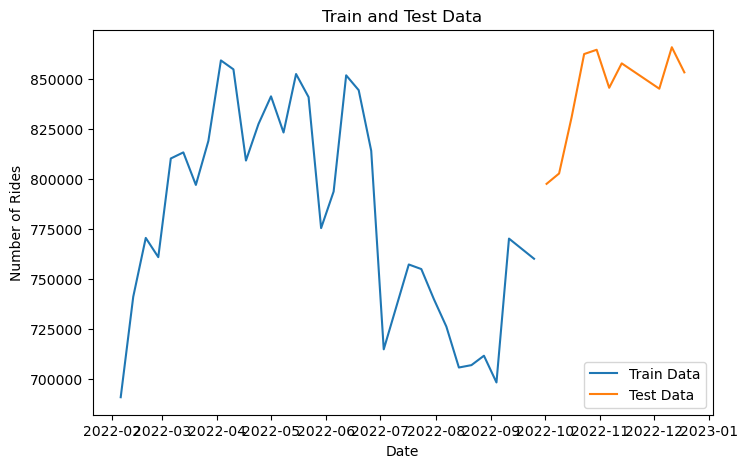

In [56]:
import matplotlib.pyplot as plt

# Plot train_data and test_data in the same figure
plt.figure(figsize=(8, 5))
plt.plot(train_data['ds'], train_data['y'], label='Train Data')
plt.plot(test_data['ds'], test_data['y'], label='Test Data')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Train and Test Data')
plt.legend()
plt.show()

In [57]:
import matplotlib.pyplot as plt
from prophet import Prophet




# Initialize the Prophet model
train_model = Prophet(seasonality_mode='multiplicative', interval_width=0.95, changepoint_prior_scale=0.3, changepoint_range=0.4, seasonality_prior_scale=8)
train_model.add_seasonality(name='monthly', period=30, fourier_order=17)

# Fit the model using the training data
train_model.fit(train_data)

# Make predictions on the testing data
future_train = train_model.make_future_dataframe(periods=len(test_data), freq='W', include_history=False)
forecast_train = train_model.predict(future_train)

# Plot the forecasted values and uncertainty
fig_forecast_train = train_model.plot(forecast_train, uncertainty=True)
plt.show()

# Plot the components of the forecasted values
fig_components_train = train_model.plot_components(forecast_train)
plt.show()


22:56:33 - cmdstanpy - INFO - Chain [1] start processing


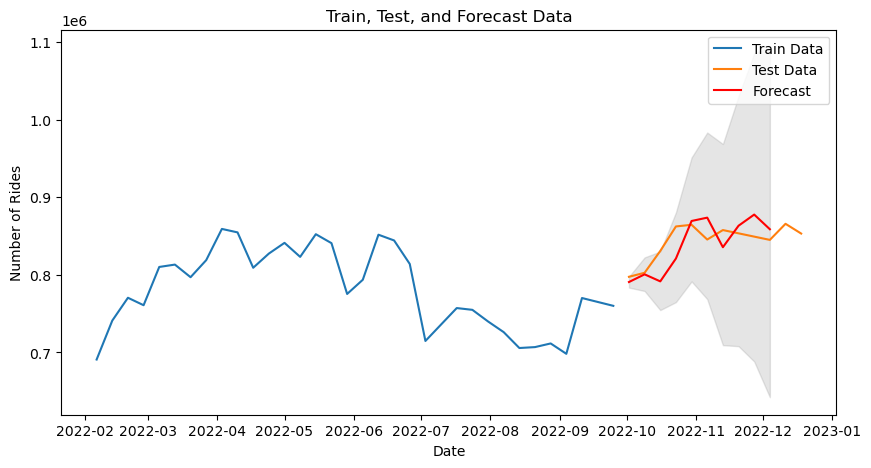

In [ ]:
import matplotlib.pyplot as plt

# Get the forecasted values and uncertainty
forecast_train_values = forecast_train['yhat'].values
forecast_train_lower = forecast_train['yhat_lower'].values
forecast_train_upper = forecast_train['yhat_upper'].values
forecast_train_dates = forecast_train['ds'].values

# Plot train_data and test_data in the same figure
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(train_data['ds'], train_data['y'], label='Train Data')
ax.plot(test_data['ds'], test_data['y'], label='Test Data')

# Add the forecasted values and uncertainty to the plot
ax.plot(forecast_train_dates, forecast_train_values, color='red', label='Forecast')
ax.fill_between(forecast_train_dates, forecast_train_lower, forecast_train_upper, color='gray', alpha=0.2)

plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Train, Test, and Forecast Data')
plt.legend()
plt.show()

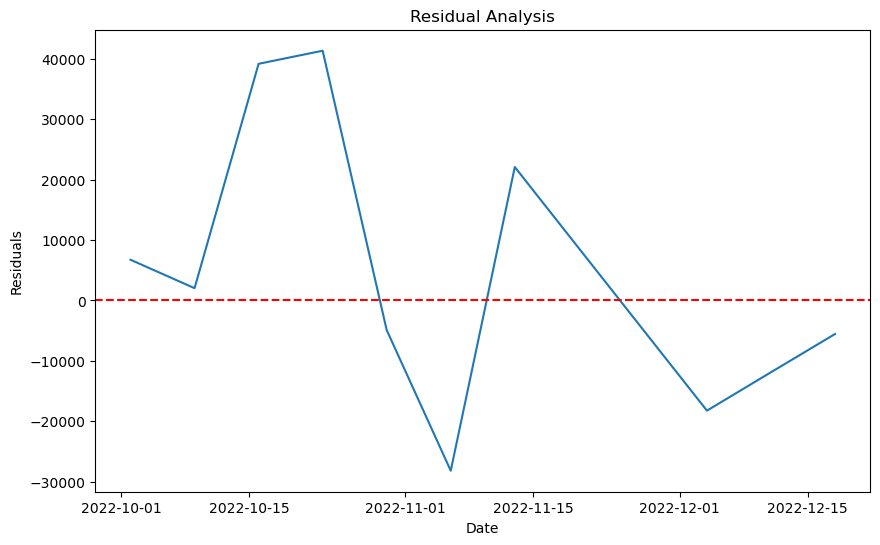

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals
actual_values = test_data['y'].values
predicted_values = forecast_train['yhat'].values
residuals = actual_values - predicted_values

# Plot the residuals over time
plt.figure(figsize=(10, 6))
plt.plot(test_data['ds'], residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()



The graph shows the residuals over time for a time series forecasting model. The residuals represent the differences between the actual values and the predicted values. The graph helps analyze the model's performance and identify any patterns or biases in the forecasts. There is a significant increase in the number of rides around October 15, 2022, reaching a peak value of approximately 4000. This indicates a surge in taxi demand during that period, possibly due to specific events, holidays, or other factors driving increased transportation needs.
However, around November 1, 2022, there is a substantial decline in the number of rides, reaching a value close to -3000. This suggests a sharp decrease in taxi demand during that timeframe, which could be attributed to various reasons such as seasonal changes, reduced travel activities, or specific events that led to a decrease in transportation requirements.

These fluctuations in the number of rides reflect the dynamic nature of the taxi service demand and highlight the importance of considering such factors when analyzing and forecasting future trends.

The red dashed line at y=0 serves as a reference line for zero residuals. Positive residuals indicate overestimation, while negative residuals indicate underestimation.  it is generally desirable to have residuals distributed around the zero line without any clear patterns or trends. If the residuals exhibit a systematic pattern or show significant deviations from zero, further analysis may be required to refine the forecasting model.


In [ ]:
# Calculate and print evaluation metrics
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actual_values, predicted_values)

print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 18017.622456727935


The mean absolute error (MAE) value of 18017.62 indicates the average magnitude of the errors between the forecasted values and the actual values (test-data). The closer to 0, the better our forecasting model is. 
The MAE of 18017.62 suggests that the forecasted values, on average, differ from the actual values by approximately 18017.62 rides.
However, it is difficult to predict the future, the forecasting model comes c


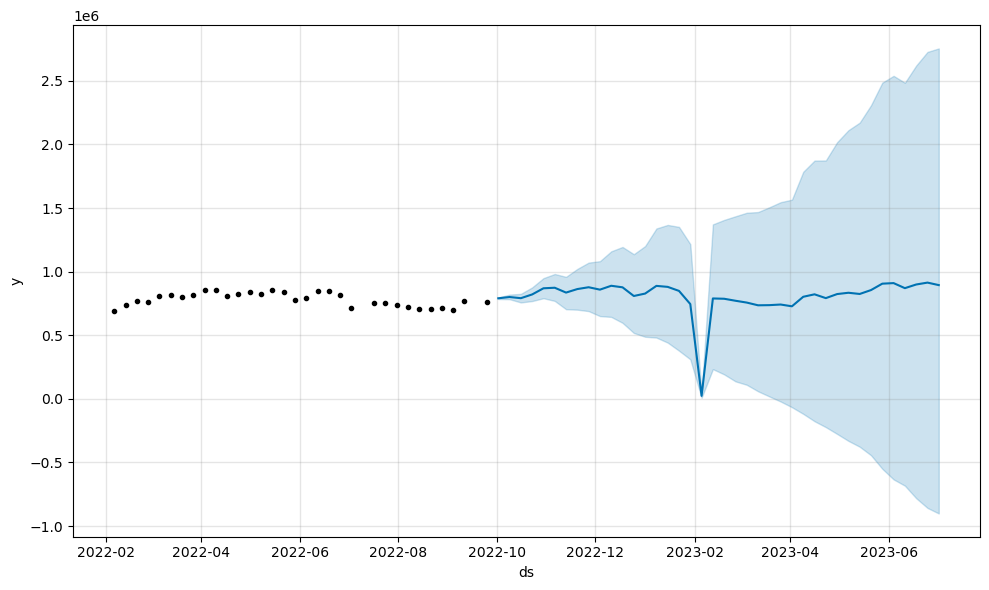

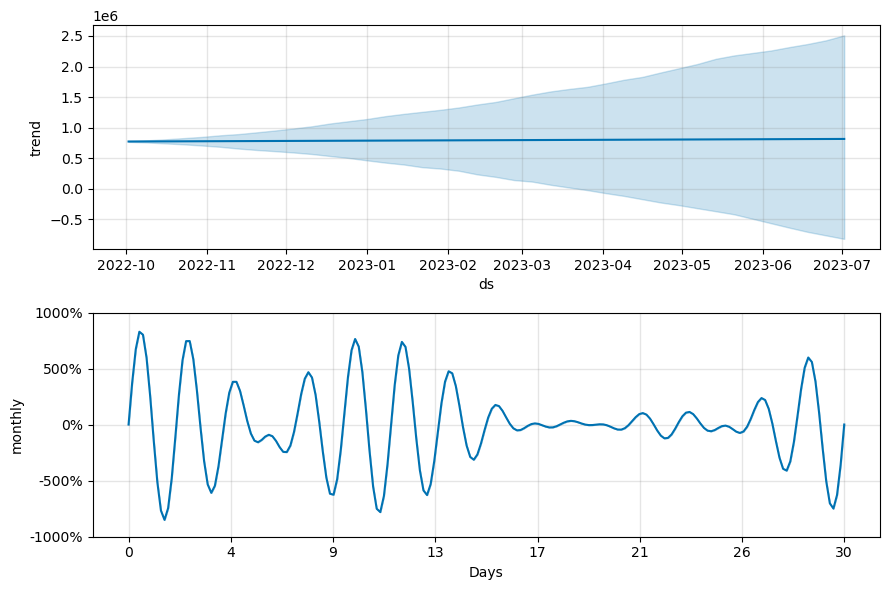

In [ ]:
import matplotlib.pyplot as plt
from prophet import Prophet


# Make future predictions
future = train_model.make_future_dataframe(periods=40, freq='W', include_history=False)
forecast = train_model.predict(future)

# Plot the forecasted values and uncertainty
fig2_forecast = train_model.plot(forecast, uncertainty=True)
plt.show()

# Plot the components of the forecasted values
fig2_components = train_model.plot_components(forecast)
plt.show()

Forecast for Green Taxis:

In [ ]:
start_date = pd.to_datetime('2022-01-03 00:00:00')
end_date = pd.to_datetime('2022-12-31 23:59:00')
df_green2 = df_green2[(df_green2['lpep_pickup_datetime'] >= start_date) & (df_green2['lpep_pickup_datetime'] <= end_date)]


In [ ]:
df_green2['lpep_pickup_datetime'] = pd.to_datetime(df_green2['lpep_pickup_datetime'])
df_green2['number_of_rides'] = 1

# Opret en gruppebaseret dataframe ved at akkumulere antallet af ture pr. uge
df_ForecastedGreen = df_green2.groupby(pd.Grouper(key='lpep_pickup_datetime', freq='W'))['number_of_rides'].sum().reset_index()
#df_ForecastYellow = df_yellow[['tpep_pickup_datetime', 'number_of_rides']].sample(100)
#pd.Grouper: pakke fra panda som giver mig en særlig gruppering. 
#freq at det skal være i uger
#sum summerer number of rides på hver uge
#reset.index, så df ikke får nyt index iforhold til de her datetimes. 

df_ForecastedGreen = df_ForecastedGreen.rename(columns={'lpep_pickup_datetime': 'ds', 'number_of_rides': 'y'})

In [ ]:
df_ForecastedGreen.head()


ds      y
0 2022-01-09  14279
1 2022-01-16  14803
2 2022-01-23  14587
3 2022-01-30  13780
4 2022-02-06  17178

In [ ]:
#Split the data into training and testing sets
train_data_green = df_ForecastedGreen[df_ForecastedGreen['ds'] < '2022-10-01']
test_data_green = df_ForecastedGreen[df_ForecastedGreen['ds'] >= '2022-10-01']

In [ ]:

threshold_green = 14500

# Filter out the rows with values below the threshold in the train data
train_data_green = train_data_green[train_data_green['y'] >= threshold_green]

# Filter out the rows with values below the threshold in the test data
test_data_green = test_data_green[test_data_green['y'] >= threshold_green]


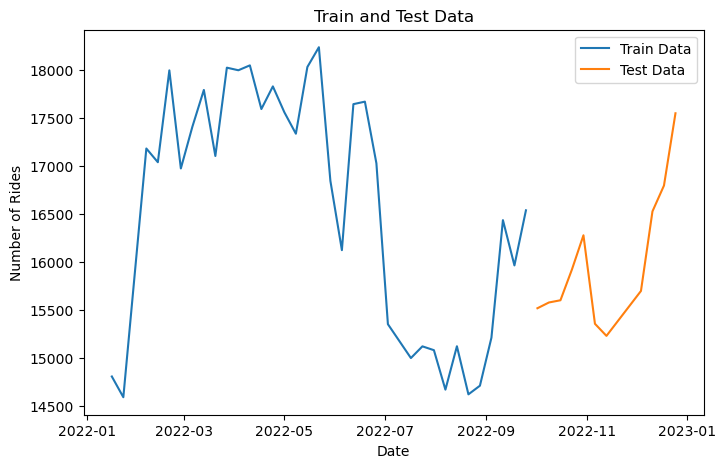

In [ ]:
import matplotlib.pyplot as plt

# Plot train_data and test_data in the same figure
plt.figure(figsize=(8, 5))
plt.plot(train_data_green['ds'], train_data_green['y'], label='Train Data')
plt.plot(test_data_green['ds'], test_data_green['y'], label='Test Data')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Train and Test Data')
plt.legend()
plt.show()

21:31:21 - cmdstanpy - INFO - Chain [1] start processing
21:31:41 - cmdstanpy - INFO - Chain [1] done processing


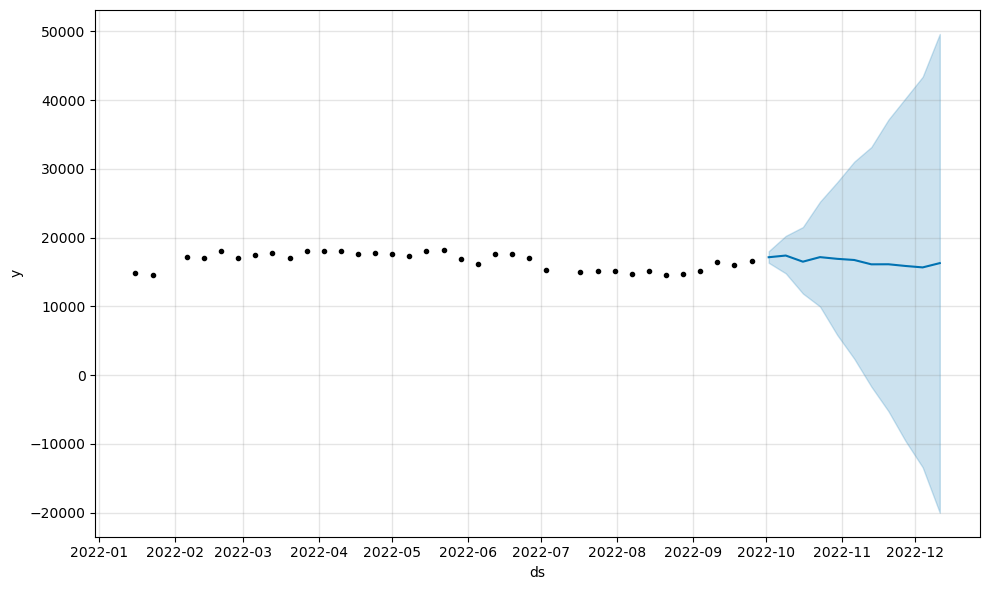

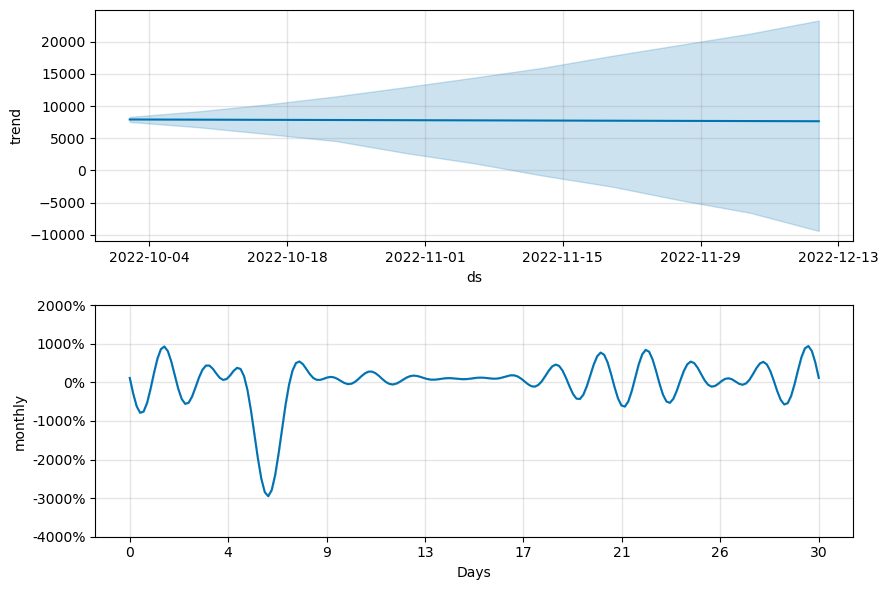

In [ ]:
import matplotlib.pyplot as plt
from prophet import Prophet


# Initialize the Prophet model
train_model_green = Prophet(seasonality_mode='multiplicative', interval_width=0.95, changepoint_prior_scale=0.3, changepoint_range=0.4, seasonality_prior_scale=8)
train_model_green.add_seasonality(name='monthly', period=30, fourier_order=17)

# Fit the model using the training data
train_model_green.fit(train_data_green)

# Make predictions on the testing data
future_train_green = train_model_green.make_future_dataframe(periods=len(test_data_green), freq='W', include_history=False)
forecast_train_green = train_model_green.predict(future_train_green)

# Plot the forecasted values and uncertainty
fig_forecast_train_green = train_model_green.plot(forecast_train_green, uncertainty=True)
plt.show()

# Plot the components of the forecasted values
fig_components_train_green = train_model_green.plot_components(forecast_train_green)
plt.show()

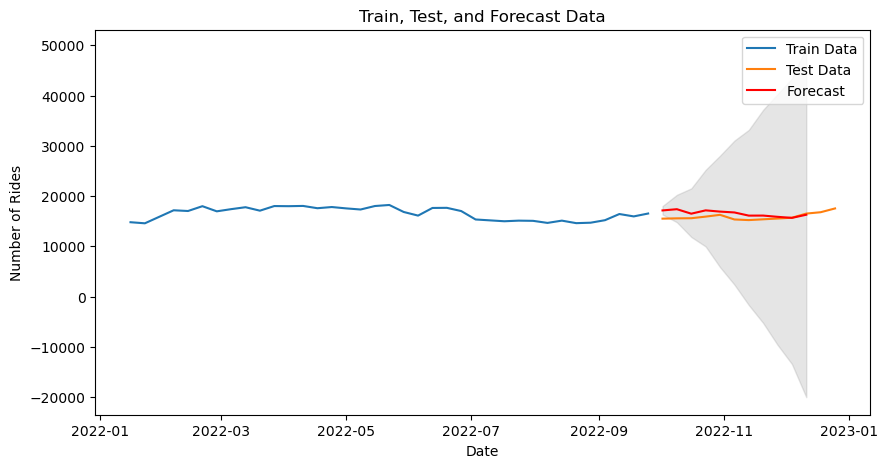

In [ ]:


# Get the forecasted values and uncertainty
forecast_train_values_green = forecast_train_green['yhat'].values
forecast_train_lower_green = forecast_train_green['yhat_lower'].values
forecast_train_upper_green = forecast_train_green['yhat_upper'].values
forecast_train_dates_green = forecast_train_green['ds'].values

# Plot train_data and test_data in the same figure
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(train_data_green['ds'], train_data_green['y'], label='Train Data')
ax.plot(test_data_green['ds'], test_data_green['y'], label='Test Data')

# Add the forecasted values and uncertainty to the plot
ax.plot(forecast_train_dates_green, forecast_train_values_green, color='red', label='Forecast')
ax.fill_between(forecast_train_dates_green, forecast_train_lower_green, forecast_train_upper_green, color='gray', alpha=0.2)

plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Train, Test, and Forecast Data')
plt.legend()
plt.show()

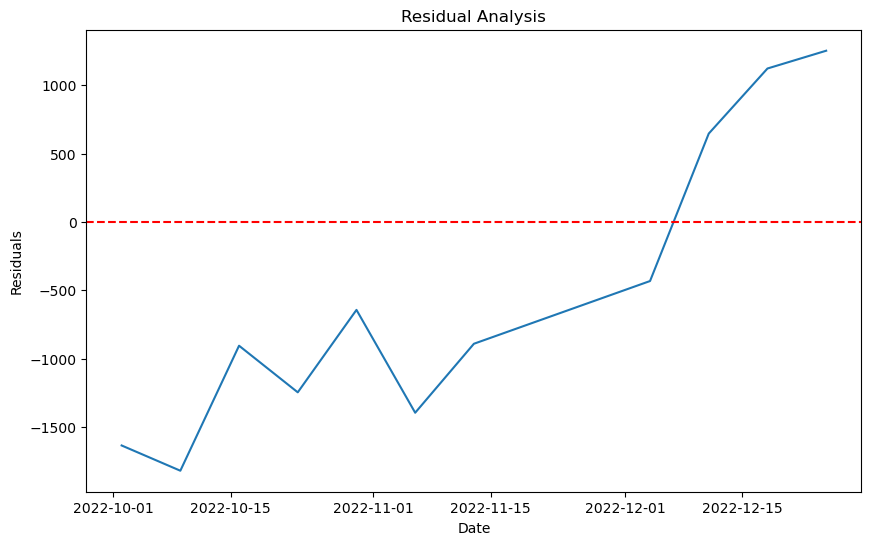

In [ ]:
import numpy as np

# Calculate residuals
actual_values_green = test_data_green['y'].values
predicted_values_green = forecast_train_green['yhat'].values
residuals_green = actual_values_green - predicted_values_green

# Plot the residuals over time
plt.figure(figsize=(10, 6))
plt.plot(test_data_green['ds'], residuals_green)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()


In [ ]:
# Calculate and print evaluation metrics

mae_green = mean_absolute_error(actual_values_green, predicted_values_green)

print("Mean Absolute Error (MAE):", mae_green)

Mean Absolute Error (MAE): 1089.6870378626475


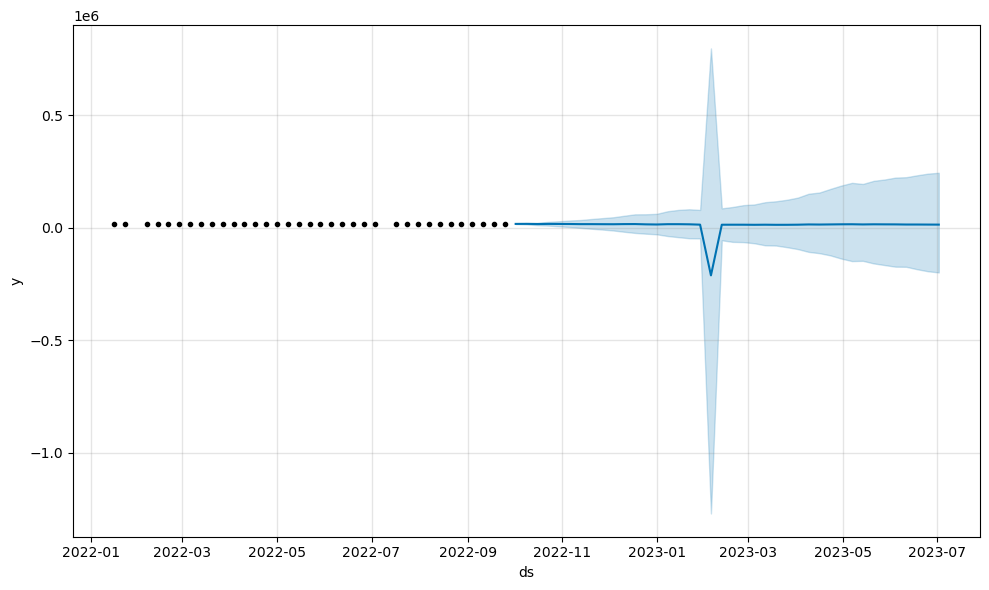

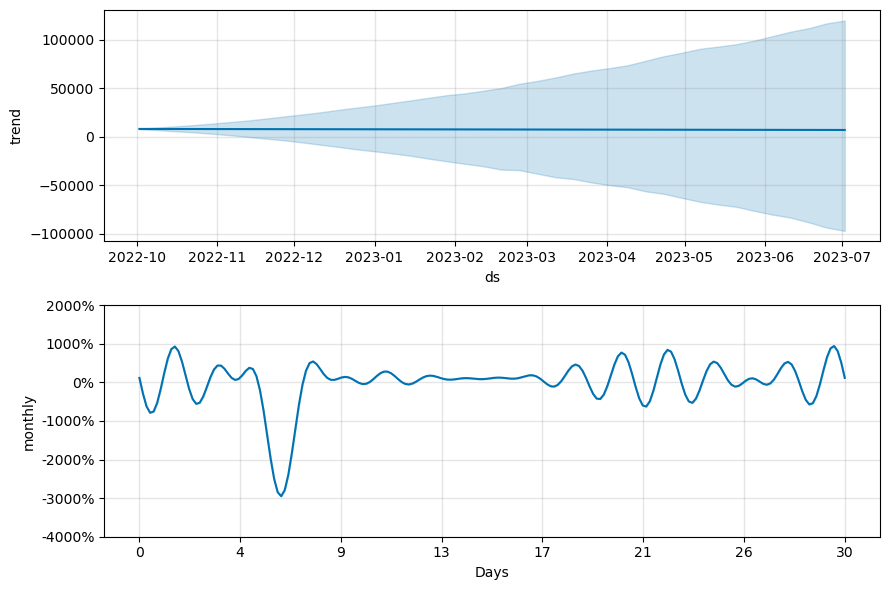

In [ ]:
import matplotlib.pyplot as plt
from prophet import Prophet


# Make future predictions
future_green = train_model_green.make_future_dataframe(periods=40, freq='W', include_history=False)
forecast_green = train_model_green.predict(future_green)

# Plot the forecasted values and uncertainty
fig2_forecast_green = train_model_green.plot(forecast_green, uncertainty=True)
plt.show()

# Plot the components of the forecasted values
fig2_components_green = train_model_green.plot_components(forecast_green)
plt.show()

### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.